Se importan las bibliotecas necesarias:

TensorFlow y Keras: para construir y entrenar el modelo de CNN.
MNIST Dataset: conjunto de datos que contiene imágenes de dígitos escritos a mano (0-9).
Matplotlib: para graficar el rendimiento del modelo

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Se carga el conjunto de datos MNIST, que se divide en dos partes:

x_train y y_train: datos de entrenamiento (imágenes y etiquetas).
x_test y y_test: datos de prueba (para evaluar el modelo).

In [2]:
# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Se redimensionan las imágenes para que incluyan un canal adicional (28x28x1), necesario para el procesamiento en la CNN, y se normalizan dividiendo entre 255 (cada valor de píxel queda entre 0 y 1).

In [3]:
# Preprocesamiento de los datos
# Redimensionar las imágenes para que tengan un canal adicional (28x28x1) y normalizar
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

Las etiquetas se convierten a one-hot encoding, representando cada dígito como un vector con una posición activa.

In [4]:
# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Se construye la arquitectura de la CNN:

Primera capa convolucional: utiliza 32 filtros de tamaño 3x3 y activación ReLU. Detecta patrones simples como bordes en las imágenes de entrada.
Capa de Max Pooling: reduce la dimensionalidad, extrayendo características relevantes.
Segunda y tercera capas convolucionales: utilizan 64 filtros cada una para extraer características más complejas.

In [5]:
# Construcción del modelo CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

c:\Users\gabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Estas capas son densas:

Flatten: aplana los mapas de características en un vector de una dimensión.
Primera capa densa: con 64 neuronas y activación ReLU para una representación completa de las características.
Capa de salida: 10 neuronas con activación softmax para clasificar las imágenes en 10 clases (dígitos del 0 al 9).

In [6]:
# Agregar capas densas (fully connected) al final de las capas convolucionales
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 clases para dígitos 0-9

Se compila el modelo especificando:

Optimizador Adam: adapta automáticamente la tasa de aprendizaje.
Función de pérdida categorical_crossentropy: adecuada para la clasificación de múltiples clases.
Métrica de precisión: para evaluar el rendimiento del modelo.

In [7]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Muestra un resumen con detalles de cada capa del modelo y la cantidad de parámetros.

In [8]:
# Resumen del modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Se entrena el modelo con:

5 épocas y un tamaño de lote de 64.
validation_split=0.1: el 10% de los datos de entrenamiento se usa para validar el rendimiento del modelo.

In [9]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8448 - loss: 0.4704 - val_accuracy: 0.9822 - val_loss: 0.0599
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9808 - loss: 0.0609 - val_accuracy: 0.9858 - val_loss: 0.0465
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9869 - loss: 0.0396 - val_accuracy: 0.9887 - val_loss: 0.0361
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9900 - loss: 0.0315 - val_accuracy: 0.9872 - val_loss: 0.0422
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9925 - loss: 0.0228 - val_accuracy: 0.9913 - val_loss: 0.0350


Se evalúa el modelo en el conjunto de prueba y se imprime la precisión final.

In [10]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Precisión en el conjunto de prueba:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9886 - loss: 0.0351
Precisión en el conjunto de prueba: 0.991100013256073


Se grafica la precisión del entrenamiento y validación a lo largo de las épocas, permitiendo observar la evolución y si existe algún problema como sobreajuste.

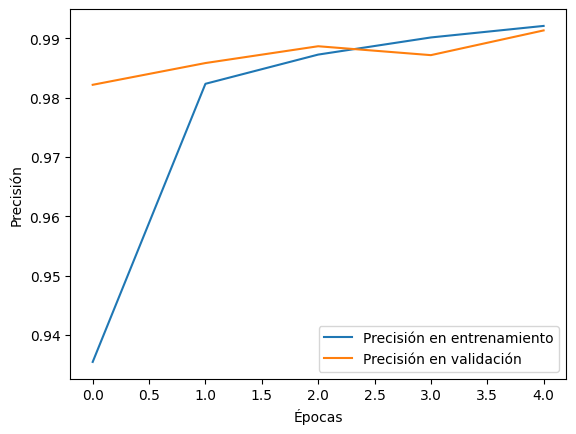

In [11]:
# Graficar el desempeño del modelo
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()